In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
test = pd.read_csv("pml-testing.csv")
train = pd.read_csv("pml-training.csv")
train.head()

/home/user/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (11,14,19,22,25,70,73,86,87,89,90,94,97,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,4,carlitos,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,5,carlitos,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A


In [2]:
train.shape

(19622, 160)

#### 刪除前七行資訊，因沒有要使用 RNN ，所以把有關時間序列的數據刪除

In [3]:
train2 = train.drop(['Unnamed: 0', 'user_name','raw_timestamp_part_1','raw_timestamp_part_2','cvtd_timestamp','new_window','num_window'], axis=1)
train2.shape

(19622, 153)

#### 刪除任何有 NaN 的行

In [4]:
train2 = train2.dropna(axis=1, how='any')

In [5]:
train2.shape

(19622, 53)

In [6]:
train2.columns

Index(['roll_belt', 'pitch_belt', 'yaw_belt', 'total_accel_belt',
       'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x',
       'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y',
       'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm',
       'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',
       'accel_arm_y', 'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y',
       'magnet_arm_z', 'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
       'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y',
       'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y',
       'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y',
       'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y',
       'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y',
       'magnet_forea

#### 畫出五種活動數據的直方圖，看是否有類別數據過多或是過少

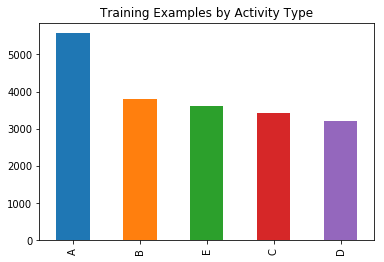

In [7]:
# Show how many training examples exist for each of the five activities
train2['classe'].value_counts().plot(kind='bar',
                                   title='Training Examples by Activity Type')
plt.show()
# Better understand how the recordings are spread across the different
# users who participated in the study+

##### 因為要放入深度學習進去訓練，因此要把 label 轉換為 1-hot
##### A 轉換為 10000 ； B 轉換為 01000；C 轉換為 00100；D 轉換為 00010；E 轉換為 00001

In [8]:
train3 = pd.get_dummies(data=train2, columns=["classe"])
train3[0:3]

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe_A,classe_B,classe_C,classe_D,classe_E
0,1.41,8.07,-94.4,3,0.00,0.0,-0.02,-21,4,22,...,203,-215,-17,654.0,476.0,1,0,0,0,0
1,1.41,8.07,-94.4,3,0.02,0.0,-0.02,-22,4,22,...,203,-216,-18,661.0,473.0,1,0,0,0,0
2,1.42,8.07,-94.4,3,0.00,0.0,-0.02,-20,5,23,...,204,-213,-18,658.0,469.0,1,0,0,0,0


##### 將訓練數據拆分為訓練集及驗證集

In [9]:
msk = np.random.rand(len(train2)) < 0.8
train_df = train3[msk]
test_df = train3[~msk]

In [10]:
nparray_train = train_df.values
nparray_test = test_df.values

In [11]:
print(nparray_train)
nparray_test.shape

[[  1.41   8.07 -94.4  ...   0.     0.     0.  ]
 [  1.42   8.07 -94.4  ...   0.     0.     0.  ]
 [  1.48   8.07 -94.4  ...   0.     0.     0.  ]
 ...
 [145.   -35.5  130.   ...   0.     0.     1.  ]
 [143.   -35.9  131.   ...   0.     0.     1.  ]
 [143.   -36.   132.   ...   0.     0.     1.  ]]


(3869, 57)

##### 把前52行數據當成feature，最後五行數據當成label

In [12]:
train_label = nparray_train[:, 52:57]
test_label = nparray_test[:, 52:57]
train_feature = nparray_train[:, 0:52]
test_feature = nparray_test[:, 0:52]

##### 使用正規化及標準化測試準確率

In [13]:
# from sklearn import preprocessing
# # 正規化
# minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
# train_feature=minmax_scale.fit_transform(train_feature)
# test_feature=minmax_scale.fit_transform(test_feature)

In [14]:
# from sklearn import preprocessing
# # 標準化
# scaler = preprocessing.StandardScaler()
# train_feature = scaler.fit_transform(train_feature)
# test_feature = scaler.fit_transform(test_feature)

In [15]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel("train")
    plt.xlabel("Epoch")
    plt.legend(["train", "validation"], loc="center right")
    plt.show()

#### 使用了Dense層，且加入Dropout

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,BatchNormalization
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
model = Sequential()
model.add(Dense(64, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'softmax'))
#epoch 500 0.9744

Using TensorFlow backend.


In [ ]:
model = Sequential()
model.add(Dense(64, kernel_initializer='normal',activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, kernel_initializer='normal',activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'softmax'))
# epoch 500 0.9707

In [ ]:
model = Sequential()
model.add(Dense(128, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'softmax'))
#epoch 500 0.9761

In [ ]:
model = Sequential()
model.add(Dense(256, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'softmax'))
#epoch 500 0.9790

In [ ]:
model = Sequential()
model.add(Dense(256, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'softmax'))
#epoch 500 0.9794

In [17]:
model = Sequential()
model.add(Dense(256, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'softmax'))
#epoch 500 0.9801

In [ ]:
model = Sequential()
model.add(Dense(512, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'softmax'))
#epoch 500 0.9796

In [ ]:
model = Sequential()
model.add(Dense(256, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'softmax'))
# #epoch 500 0.9765

In [ ]:
model = Sequential()
model.add(Dense(512, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'softmax'))
# #epoch 500 0.9788

In [ ]:
model = Sequential()
model.add(Dense(256, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'softmax'))
#epoch 500 0.9788

In [ ]:
model = Sequential()
model.add(Dense(256, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, kernel_initializer='normal',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'softmax'))
#epoch 500 0.9790

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint = ModelCheckpoint('weights.best.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [19]:
train_history = model.fit(x=train_feature, y=train_label, validation_split=0.1, epochs=500, batch_size=256,verbose=2)

Train on 14177 samples, validate on 1576 samples
Epoch 1/500
 - 2s - loss: 0.4580 - acc: 0.8104 - val_loss: 0.7224 - val_acc: 0.6989
Epoch 2/500
 - 1s - loss: 0.3452 - acc: 0.8566 - val_loss: 0.7952 - val_acc: 0.6725
Epoch 3/500
 - 1s - loss: 0.2798 - acc: 0.8869 - val_loss: 0.8437 - val_acc: 0.6586
Epoch 4/500
 - 1s - loss: 0.2379 - acc: 0.9059 - val_loss: 0.8444 - val_acc: 0.6791
Epoch 5/500
 - 1s - loss: 0.2069 - acc: 0.9206 - val_loss: 0.7351 - val_acc: 0.7185
Epoch 6/500
 - 1s - loss: 0.1838 - acc: 0.9322 - val_loss: 0.8558 - val_acc: 0.6942
Epoch 7/500
 - 1s - loss: 0.1657 - acc: 0.9390 - val_loss: 0.7258 - val_acc: 0.7448
Epoch 8/500
 - 1s - loss: 0.1535 - acc: 0.9435 - val_loss: 0.8194 - val_acc: 0.7336
Epoch 9/500
 - 1s - loss: 0.1394 - acc: 0.9496 - val_loss: 0.7115 - val_acc: 0.7617
Epoch 10/500
 - 1s - loss: 0.1320 - acc: 0.9525 - val_loss: 0.7841 - val_acc: 0.7586
Epoch 11/500
 - 1s - loss: 0.1235 - acc: 0.9558 - val_loss: 0.8317 - val_acc: 0.7484
Epoch 12/500
 - 1s - loss

Epoch 97/500
 - 1s - loss: 0.0271 - acc: 0.9908 - val_loss: 1.0047 - val_acc: 0.8109
Epoch 98/500
 - 1s - loss: 0.0260 - acc: 0.9914 - val_loss: 1.0633 - val_acc: 0.7975
Epoch 99/500
 - 1s - loss: 0.0259 - acc: 0.9914 - val_loss: 1.0494 - val_acc: 0.8023
Epoch 100/500
 - 1s - loss: 0.0243 - acc: 0.9920 - val_loss: 1.1815 - val_acc: 0.7900
Epoch 101/500
 - 1s - loss: 0.0258 - acc: 0.9914 - val_loss: 1.2372 - val_acc: 0.7751
Epoch 102/500
 - 1s - loss: 0.0265 - acc: 0.9909 - val_loss: 1.0969 - val_acc: 0.7879
Epoch 103/500
 - 1s - loss: 0.0279 - acc: 0.9907 - val_loss: 1.0920 - val_acc: 0.7893
Epoch 104/500
 - 1s - loss: 0.0255 - acc: 0.9914 - val_loss: 1.1863 - val_acc: 0.7741
Epoch 105/500
 - 1s - loss: 0.0241 - acc: 0.9920 - val_loss: 1.1873 - val_acc: 0.7744
Epoch 106/500
 - 1s - loss: 0.0249 - acc: 0.9915 - val_loss: 1.1047 - val_acc: 0.7980
Epoch 107/500
 - 1s - loss: 0.0251 - acc: 0.9919 - val_loss: 1.2144 - val_acc: 0.7942
Epoch 108/500
 - 1s - loss: 0.0251 - acc: 0.9915 - val_lo

Epoch 193/500
 - 1s - loss: 0.0158 - acc: 0.9944 - val_loss: 1.1567 - val_acc: 0.8119
Epoch 194/500
 - 1s - loss: 0.0169 - acc: 0.9940 - val_loss: 1.2556 - val_acc: 0.8119
Epoch 195/500
 - 1s - loss: 0.0169 - acc: 0.9942 - val_loss: 1.0951 - val_acc: 0.8160
Epoch 196/500
 - 1s - loss: 0.0166 - acc: 0.9943 - val_loss: 1.0990 - val_acc: 0.8157
Epoch 197/500
 - 1s - loss: 0.0204 - acc: 0.9928 - val_loss: 1.2208 - val_acc: 0.8049
Epoch 198/500
 - 1s - loss: 0.0182 - acc: 0.9938 - val_loss: 1.2545 - val_acc: 0.7964
Epoch 199/500
 - 1s - loss: 0.0179 - acc: 0.9939 - val_loss: 1.2389 - val_acc: 0.7990
Epoch 200/500
 - 1s - loss: 0.0176 - acc: 0.9939 - val_loss: 1.2003 - val_acc: 0.8066
Epoch 201/500
 - 1s - loss: 0.0166 - acc: 0.9950 - val_loss: 1.2463 - val_acc: 0.8014
Epoch 202/500
 - 1s - loss: 0.0164 - acc: 0.9945 - val_loss: 1.1525 - val_acc: 0.8069
Epoch 203/500
 - 1s - loss: 0.0186 - acc: 0.9943 - val_loss: 1.2227 - val_acc: 0.7972
Epoch 204/500
 - 1s - loss: 0.0156 - acc: 0.9950 - val

Epoch 289/500
 - 1s - loss: 0.0131 - acc: 0.9955 - val_loss: 1.3987 - val_acc: 0.7897
Epoch 290/500
 - 1s - loss: 0.0128 - acc: 0.9958 - val_loss: 1.4526 - val_acc: 0.7822
Epoch 291/500
 - 1s - loss: 0.0128 - acc: 0.9958 - val_loss: 1.2806 - val_acc: 0.8025
Epoch 292/500
 - 1s - loss: 0.0154 - acc: 0.9946 - val_loss: 1.3283 - val_acc: 0.8005
Epoch 293/500
 - 1s - loss: 0.0130 - acc: 0.9956 - val_loss: 1.2409 - val_acc: 0.8113
Epoch 294/500
 - 1s - loss: 0.0123 - acc: 0.9959 - val_loss: 1.4168 - val_acc: 0.7780
Epoch 295/500
 - 1s - loss: 0.0150 - acc: 0.9950 - val_loss: 1.2958 - val_acc: 0.7978
Epoch 296/500
 - 1s - loss: 0.0129 - acc: 0.9957 - val_loss: 1.2863 - val_acc: 0.8034
Epoch 297/500
 - 1s - loss: 0.0109 - acc: 0.9963 - val_loss: 1.3447 - val_acc: 0.8036
Epoch 298/500
 - 1s - loss: 0.0113 - acc: 0.9964 - val_loss: 1.3953 - val_acc: 0.8003
Epoch 299/500
 - 1s - loss: 0.0125 - acc: 0.9959 - val_loss: 1.4999 - val_acc: 0.7777
Epoch 300/500
 - 1s - loss: 0.0133 - acc: 0.9956 - val

Epoch 385/500
 - 1s - loss: 0.0116 - acc: 0.9962 - val_loss: 1.3087 - val_acc: 0.8156
Epoch 386/500
 - 1s - loss: 0.0103 - acc: 0.9965 - val_loss: 1.2785 - val_acc: 0.8069
Epoch 387/500
 - 1s - loss: 0.0113 - acc: 0.9965 - val_loss: 1.2361 - val_acc: 0.8113
Epoch 388/500
 - 1s - loss: 0.0078 - acc: 0.9976 - val_loss: 1.4193 - val_acc: 0.7963
Epoch 389/500
 - 1s - loss: 0.0116 - acc: 0.9963 - val_loss: 1.2872 - val_acc: 0.7968
Epoch 390/500
 - 1s - loss: 0.0097 - acc: 0.9968 - val_loss: 1.4801 - val_acc: 0.7948
Epoch 391/500
 - 1s - loss: 0.0097 - acc: 0.9971 - val_loss: 1.4029 - val_acc: 0.7975
Epoch 392/500
 - 1s - loss: 0.0105 - acc: 0.9967 - val_loss: 1.2375 - val_acc: 0.8065
Epoch 393/500
 - 1s - loss: 0.0102 - acc: 0.9968 - val_loss: 1.3140 - val_acc: 0.8062
Epoch 394/500
 - 1s - loss: 0.0091 - acc: 0.9973 - val_loss: 1.3361 - val_acc: 0.8109
Epoch 395/500
 - 1s - loss: 0.0077 - acc: 0.9973 - val_loss: 1.4215 - val_acc: 0.7873
Epoch 396/500
 - 1s - loss: 0.0135 - acc: 0.9956 - val

Epoch 481/500
 - 1s - loss: 0.0106 - acc: 0.9965 - val_loss: 1.3281 - val_acc: 0.8063
Epoch 482/500
 - 1s - loss: 0.0087 - acc: 0.9969 - val_loss: 1.2959 - val_acc: 0.8065
Epoch 483/500
 - 1s - loss: 0.0075 - acc: 0.9977 - val_loss: 1.3546 - val_acc: 0.8094
Epoch 484/500
 - 1s - loss: 0.0092 - acc: 0.9974 - val_loss: 1.6036 - val_acc: 0.7872
Epoch 485/500
 - 1s - loss: 0.0092 - acc: 0.9971 - val_loss: 1.4941 - val_acc: 0.7937
Epoch 486/500
 - 1s - loss: 0.0094 - acc: 0.9970 - val_loss: 1.4967 - val_acc: 0.7938
Epoch 487/500
 - 1s - loss: 0.0076 - acc: 0.9978 - val_loss: 1.4416 - val_acc: 0.7970
Epoch 488/500
 - 1s - loss: 0.0087 - acc: 0.9972 - val_loss: 1.3697 - val_acc: 0.8032
Epoch 489/500
 - 1s - loss: 0.0090 - acc: 0.9971 - val_loss: 1.4311 - val_acc: 0.7937
Epoch 490/500
 - 1s - loss: 0.0119 - acc: 0.9966 - val_loss: 1.3188 - val_acc: 0.8033
Epoch 491/500
 - 1s - loss: 0.0091 - acc: 0.9970 - val_loss: 1.4950 - val_acc: 0.7863
Epoch 492/500
 - 1s - loss: 0.0063 - acc: 0.9979 - val

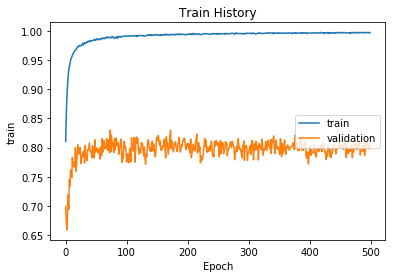

In [25]:
show_train_history(train_history, "acc", "val_acc")

In [21]:
score = model.evaluate(x=test_feature,y=test_label)

3869/3869 [==============================] - 0s 40us/step


In [22]:
score[1]

0.9795295966167603

In [23]:
test = test[['roll_belt','pitch_belt', 'yaw_belt', 'total_accel_belt',
       'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x',
       'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y',
       'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm',
       'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',
       'accel_arm_y', 'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y',
       'magnet_arm_z', 'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
       'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y',
       'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y',
       'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y',
       'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y',
       'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y',
       'magnet_forearm_z']]

In [24]:
predict = model.predict(test)
predict = [np.argmax(predict)for predict in predict]
print(predict)
dict1 = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'}

[1, 0, 1, 0, 0, 2, 3, 1, 0, 0, 1, 2, 1, 0, 4, 4, 0, 1, 1, 1]


In [31]:
print('The accuracy of DNN is', score[1])
list2 = []
for i in range(len(predict)):
    u = dict1[(predict[i])]
    list2.append(dict1[(predict[i])])
print(list2)

The accuracy of DNN is 0.9795295966167603
['B', 'A', 'B', 'A', 'A', 'C', 'D', 'B', 'A', 'A', 'B', 'C', 'B', 'A', 'E', 'E', 'A', 'B', 'B', 'B']
